In [1]:
%pip install pandas 
%pip install numpy 
%pip install matplotlib 
%pip install tensorflow 
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



## FORECASTING

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('position_tortoise_data.csv')

f = pd.to_datetime(data['Date found'])
data['day'] = f.dt.day


data.head()

,Date found,NestID,Latitude,Longitude,Elevation,Egg number,Egg length mm,Egg mass g,month,year,day
0,08/06/2013,20131,-0.72095,-90.46495,17,1,41.59,116.4,8,2013,6
1,08/06/2013,20131,-0.72095,-90.46495,17,2,42.38,113.3,8,2013,6
2,08/06/2013,20131,-0.72095,-90.46495,17,3,41.98,118.2,8,2013,6
3,9/16/2013,201310,-0.69992,-90.45770,106,1,59.42,119.7,9,2013,16
4,9/16/2013,201310,-0.69992,-90.45770,106,2,58.97,116.4,9,2013,16


In [5]:
# Preparar los datos para el pronóstico


data['Date'] = pd.to_datetime(data['Date found'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.head()

,Date found,NestID,Latitude,Longitude,Elevation,Egg number,Egg length mm,Egg mass g,month,year,day,Date,Year,Month,Day
0,08/06/2013,20131,-0.72095,-90.46495,17,1,41.59,116.4,8,2013,6,2013-08-06,2013,8,6
1,08/06/2013,20131,-0.72095,-90.46495,17,2,42.38,113.3,8,2013,6,2013-08-06,2013,8,6
2,08/06/2013,20131,-0.72095,-90.46495,17,3,41.98,118.2,8,2013,6,2013-08-06,2013,8,6
3,9/16/2013,201310,-0.69992,-90.45770,106,1,59.42,119.7,9,2013,16,2013-09-16,2013,9,16
4,9/16/2013,201310,-0.69992,-90.45770,106,2,58.97,116.4,9,2013,16,2013-09-16,2013,9,16


In [6]:
# Seleccionar las variables predictoras y las variables objetivo
X_forecast = data[['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Egg number']]
y_latitude = data['Latitude']
y_longitude = data['Longitude']

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_latitude_train, y_latitude_test, y_longitude_train, y_longitude_test = train_test_split(
    X_forecast, y_latitude, y_longitude, test_size=0.2, random_state=42
)

In [8]:
# Crear y entrenar el modelo de pronóstico para la latitud
rf_latitude = RandomForestRegressor(n_estimators=100, random_state=42)
rf_latitude.fit(X_train, y_latitude_train)


RandomForestRegressor(random_state=42)

In [9]:
# Crear y entrenar el modelo de pronóstico para la longitud
rf_longitude = RandomForestRegressor(n_estimators=100, random_state=42)
rf_longitude.fit(X_train, y_longitude_train)


RandomForestRegressor(random_state=42)

In [10]:
# Realizar el pronóstico en el conjunto de prueba (latitude, longitude)
latitude_predictions = rf_latitude.predict(X_test)
longitude_predictions = rf_longitude.predict(X_test)

In [11]:
# Guardar las predicciones en un archivo CSV
predictions_data = pd.DataFrame({
    'year': X_test['Year'],
    'month': X_test['Month'],
    'day': X_test['Day'],
    'Latitude_pred': latitude_predictions,
    'Longitude_pred': longitude_predictions
})
predictions_data.to_csv('predictions.csv', index=False)

In [12]:
from sklearn.metrics import r2_score

# Calcular las métricas de evaluación
mse_latitude = mean_squared_error(y_latitude_test, latitude_predictions)
mae_latitude = mean_absolute_error(y_latitude_test, latitude_predictions)
r2_latitude = r2_score(y_latitude_test, latitude_predictions)

mse_longitude = mean_squared_error(y_longitude_test, longitude_predictions)
mae_longitude = mean_absolute_error(y_longitude_test, longitude_predictions)
r2_longitude = r2_score(y_longitude_test, longitude_predictions)


In [13]:
print("Latitude Forecast:")
print("Mean Squared Error (MSE):", mse_latitude)
print("Mean Absolute Error (MAE):", mae_latitude)
print("R-squared (R^2):", r2_latitude)

print()

print("Longitude Forecast:")
print("Mean Squared Error (MSE):", mse_longitude)
print("Mean Absolute Error (MAE):", mae_longitude)
print("R-squared (R^2):", r2_longitude)

Latitude Forecast:
Mean Squared Error (MSE): 1.1986852364546587e-08
Mean Absolute Error (MAE): 1.334827586253402e-05
R-squared (R^2): 0.999980373382427

Longitude Forecast:
Mean Squared Error (MSE): 4.2466605878643226e-08
Mean Absolute Error (MAE): 1.6557047045561993e-05
R-squared (R^2): 0.9999899149300823


### Graphic the Model
- plt.scatter: Esta función se utiliza para crear un gráfico de dispersión. En este contexto específico, representa los valores reales (latitud real) en el eje x y los valores predichos (latitud pronosticada por el modelo) en el eje y.
- plt.plot: En este caso, se utiliza para dibujar una línea que representa la línea de identidad, donde los valores predichos son iguales a los valores reales. Los datos que se están trazando aquí son los valores mínimos y máximos de los valores reales (latitud real)

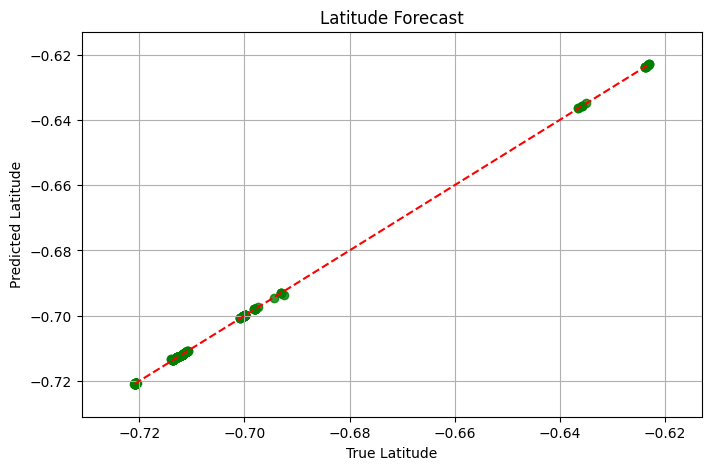

In [14]:
# Gráfico de pronóstico vs valores reales para la latitud
plt.figure(figsize=(8, 5))
plt.scatter(y_latitude_test, latitude_predictions, color='green', alpha=0.8)   #Real values
plt.plot([y_latitude_test.min(), y_latitude_test.max()], [y_latitude_test.min(), y_latitude_test.max()], 'r--', lw=1.5)

# Establecer los límites de los ejes x e y para que coincidan con los valores mínimos y máximos de los datos
padding = 0.01
plt.xlim([y_latitude_test.min() - padding, y_latitude_test.max() + padding])
plt.ylim([latitude_predictions.min() - padding, latitude_predictions.max() + padding])

plt.xlabel('True Latitude')
plt.ylabel('Predicted Latitude')
plt.title('Latitude Forecast')
plt.grid(True)
plt.show()

# Guardar la gráfica en formato PDF
#plt.savefig('latitude_forecast.pdf', bbox_inches='tight')

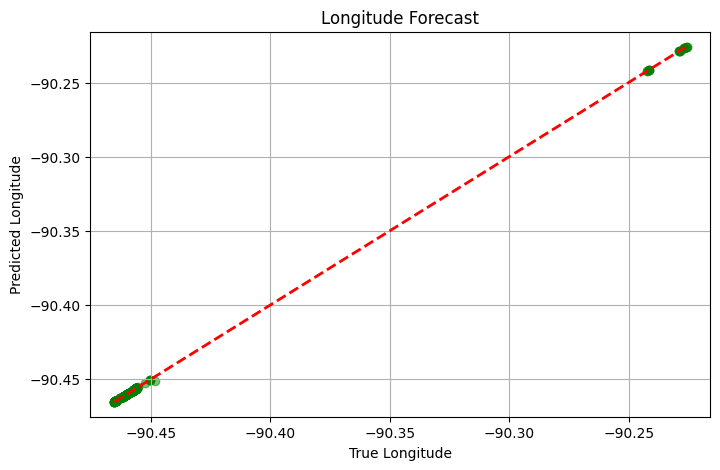

In [15]:
# Gráfico de pronóstico vs valores reales para la longitud
plt.figure(figsize=(8, 5))
plt.scatter(y_longitude_test, longitude_predictions, color='green', alpha=0.5)
plt.plot([y_longitude_test.min(), y_longitude_test.max()], [y_longitude_test.min(), y_longitude_test.max()], 'r--', lw=2)

# Establecer los límites de los ejes x e y para que coincidan con los valores mínimos y máximos de los datos
padding = 0.01
plt.xlim([y_longitude_test.min() - padding, y_longitude_test.max() + padding])
plt.ylim([longitude_predictions.min() - padding, longitude_predictions.max() + padding])


plt.xlabel('True Longitude')
plt.ylabel('Predicted Longitude')
plt.title('Longitude Forecast')
plt.grid(True)
#plt.show()

# Guardar la gráfica en formato PDF
plt.savefig('longitude_forecast.pdf', bbox_inches='tight')

plt.show()

## Classification model

In [16]:
# Cargar los datos desde el CSV
data = pd.read_csv('position_tortoise_data.csv')

f = pd.to_datetime(data['Date found'])
data['day'] = f.dt.day


data.head()

,Date found,NestID,Latitude,Longitude,Elevation,Egg number,Egg length mm,Egg mass g,month,year,day
0,08/06/2013,20131,-0.72095,-90.46495,17,1,41.59,116.4,8,2013,6
1,08/06/2013,20131,-0.72095,-90.46495,17,2,42.38,113.3,8,2013,6
2,08/06/2013,20131,-0.72095,-90.46495,17,3,41.98,118.2,8,2013,6
3,9/16/2013,201310,-0.69992,-90.45770,106,1,59.42,119.7,9,2013,16
4,9/16/2013,201310,-0.69992,-90.45770,106,2,58.97,116.4,9,2013,16


In [17]:
# Cargar las predicciones del modelo de forecasting
predictions_data = pd.read_csv('predictions.csv')
    
predictions_data.head()

,year,month,day,Latitude_pred,Longitude_pred
0,2016,7,14,-0.713273,-90.457738
1,2015,9,16,-0.712690,-90.460460
2,2014,8,29,-0.711099,-90.459389
3,2015,9,21,-0.699920,-90.457740
4,2016,8,22,-0.700140,-90.456510


In [18]:
# Combinar las predicciones con los datos originales
data_with_predictions = data.merge(predictions_data, on=['year', 'month', 'day'], how='left')

data_with_predictions.head()


,Date found,NestID,Latitude,Longitude,Elevation,Egg number,Egg length mm,Egg mass g,month,year,day,Latitude_pred,Longitude_pred
0,08/06/2013,20131,-0.72095,-90.46495,17,1,41.59,116.4,8,2013,6,-0.693593,-90.451271
1,08/06/2013,20131,-0.72095,-90.46495,17,2,42.38,113.3,8,2013,6,-0.693593,-90.451271
2,08/06/2013,20131,-0.72095,-90.46495,17,3,41.98,118.2,8,2013,6,-0.693593,-90.451271
3,9/16/2013,201310,-0.69992,-90.45770,106,1,59.42,119.7,9,2013,16,-0.699920,-90.457700
4,9/16/2013,201310,-0.69992,-90.45770,106,1,59.42,119.7,9,2013,16,-0.699930,-90.457700


In [19]:
# Rellenar los valores faltantes en las predicciones con los valores originales
data_with_predictions['Latitude_pred'] = data_with_predictions['Latitude_pred'].fillna(data_with_predictions['Latitude'])
data_with_predictions['Longitude_pred'] = data_with_predictions['Longitude_pred'].fillna(data_with_predictions['Longitude'])

data_with_predictions.head()

,Date found,NestID,Latitude,Longitude,Elevation,Egg number,Egg length mm,Egg mass g,month,year,day,Latitude_pred,Longitude_pred
0,08/06/2013,20131,-0.72095,-90.46495,17,1,41.59,116.4,8,2013,6,-0.693593,-90.451271
1,08/06/2013,20131,-0.72095,-90.46495,17,2,42.38,113.3,8,2013,6,-0.693593,-90.451271
2,08/06/2013,20131,-0.72095,-90.46495,17,3,41.98,118.2,8,2013,6,-0.693593,-90.451271
3,9/16/2013,201310,-0.69992,-90.45770,106,1,59.42,119.7,9,2013,16,-0.699920,-90.457700
4,9/16/2013,201310,-0.69992,-90.45770,106,1,59.42,119.7,9,2013,16,-0.699930,-90.457700


In [20]:
# Guardar el DataFrame actualizado en un archivo CSV
data_with_predictions.to_csv('data_with_predictions.csv', index=False)

In [21]:
# Seleccionar las variables predictoras y las variables objetivo
X = data_with_predictions[['Longitude_pred', 'Latitude_pred', 'Elevation']]
y_length = data_with_predictions['Egg length mm']
y_mass = data_with_predictions['Egg mass g']


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


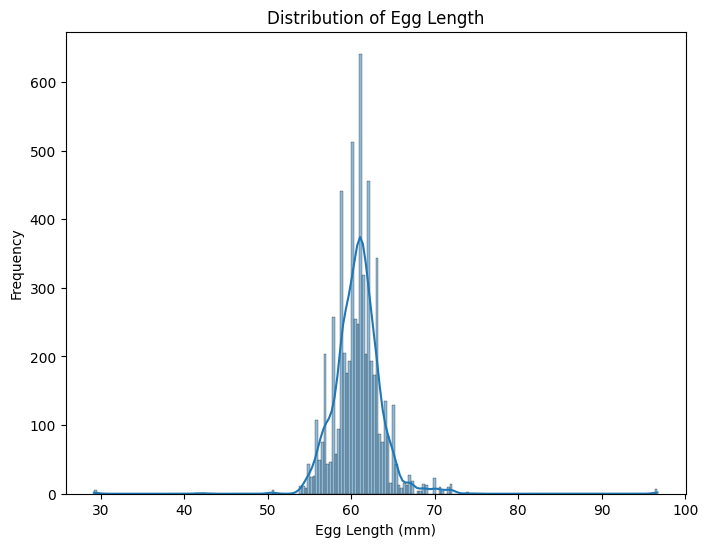

In [23]:
# Gráfica de distribución de la longitud del huevo
plt.figure(figsize=(8, 6))
sns.histplot(data=data_with_predictions, x='Egg length mm', kde=True)
plt.title('Distribution of Egg Length')
plt.xlabel('Egg Length (mm)')
plt.ylabel('Frequency')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


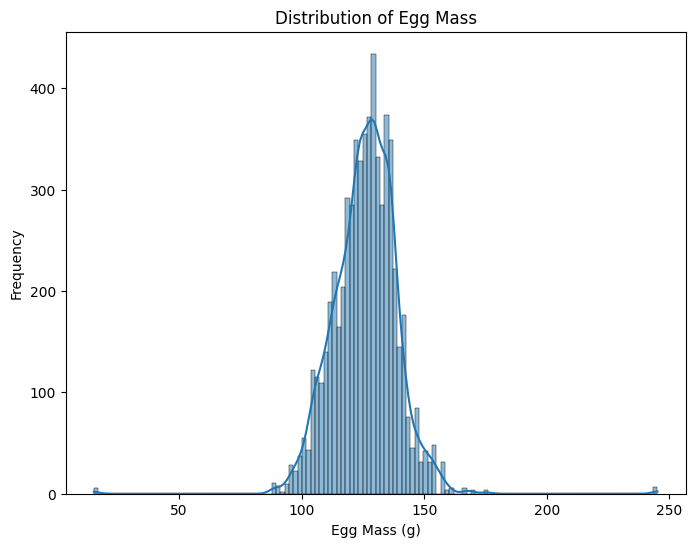

In [24]:
# Gráfica de distribución de la masa del huevo
plt.figure(figsize=(8, 6))
sns.histplot(data=data_with_predictions, x='Egg mass g', kde=True)
plt.title('Distribution of Egg Mass')
plt.xlabel('Egg Mass (g)')
plt.ylabel('Frequency')
plt.show()

In [74]:
# Discretizar las variables objetivo en clases con más bins
#y_length_class = pd.cut(y_length, bins=4, labels=["one", "two", "three", "four"])
#y_mass_class = pd.cut(y_mass, bins=4, labels=["one", "two", "three", "four"])

y_length_class = pd.qcut(y_length, q=3, labels=False)
y_mass_class = pd.qcut(y_mass, q=3, labels=False)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_length_train, y_length_test = train_test_split(X, y_length_class, test_size=0.2, random_state=42)
_, _, y_mass_train, y_mass_test = train_test_split(X, y_mass_class, test_size=0.2, random_state=42)


In [75]:
y_length_class

0       0
1       0
2       0
3       0
4       0
       ..
6197    2
6198    2
6199    2
6200    2
6201    2
Name: Egg length mm, Length: 6202, dtype: int64

In [76]:
y_mass_class.shape

(6202,)

In [26]:
X_test

,Longitude_pred,Latitude_pred,Elevation
5369,-90.456249,-0.698090,127
2463,-90.464940,-0.720760,18
2505,-90.464940,-0.720760,18
5419,-90.456249,-0.698090,129
1315,-90.459970,-0.712790,66
...,...,...,...
3647,-90.460490,-0.712710,69
2346,-90.464810,-0.720840,18
3751,-90.457660,-0.699900,106
724,-90.459390,-0.711099,69


In [77]:
import seaborn as sns

# Crear un DataFrame con las variables predictoras y las variables objetivo
data_plot = pd.DataFrame({
    'Longitude': X['Longitude_pred'],
    'Latitude': X['Latitude_pred'],
    'Elevation': X['Elevation'],
    'Length Class': y_length_class,
    'Mass Class': y_mass_class,
})

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packa

<Figure size 1000x500 with 0 Axes>

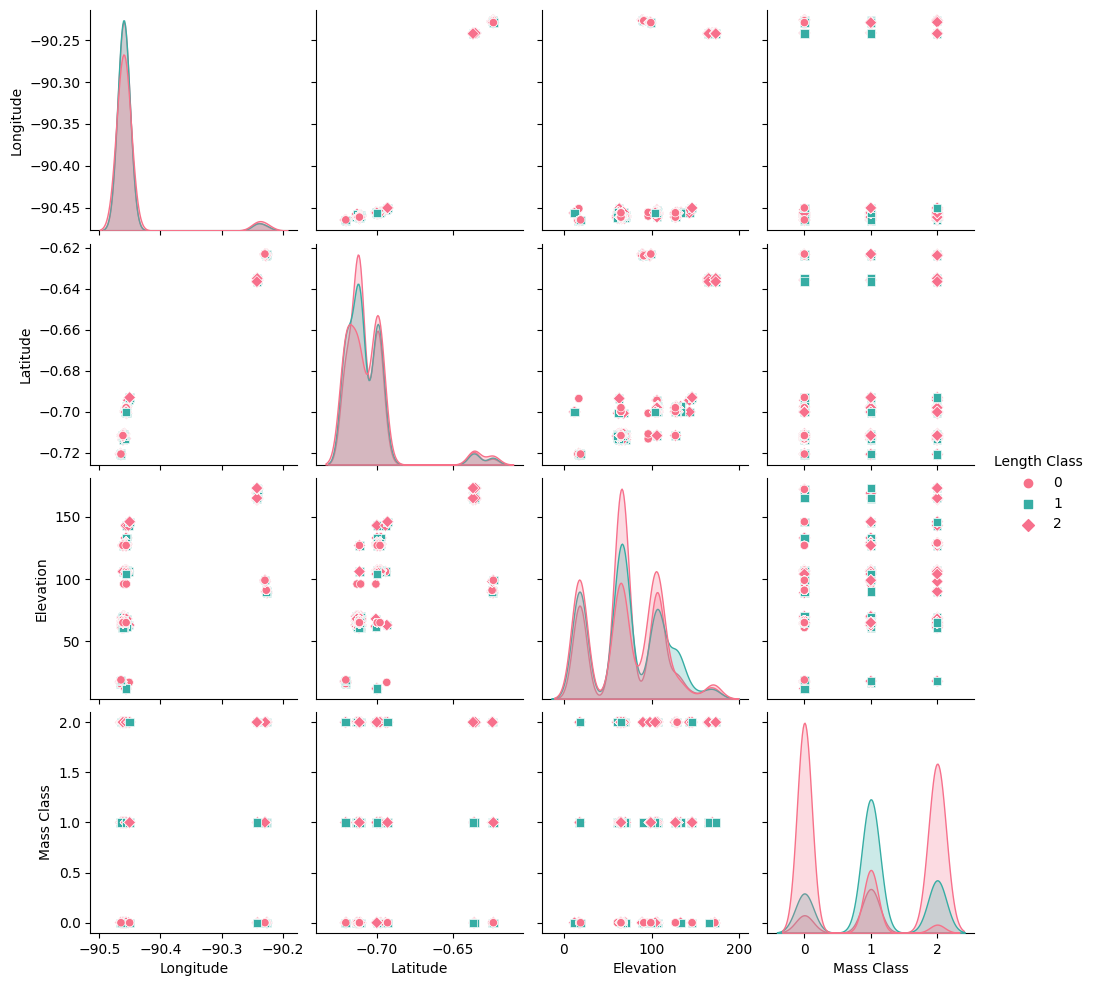

In [78]:
# Crear el pairplot
plt.figure(figsize=(10, 5))

sns.pairplot(data_plot, hue='Length Class', markers=["o", "s", "D", "v"], palette="husl")
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packa

<Figure size 1200x1000 with 0 Axes>

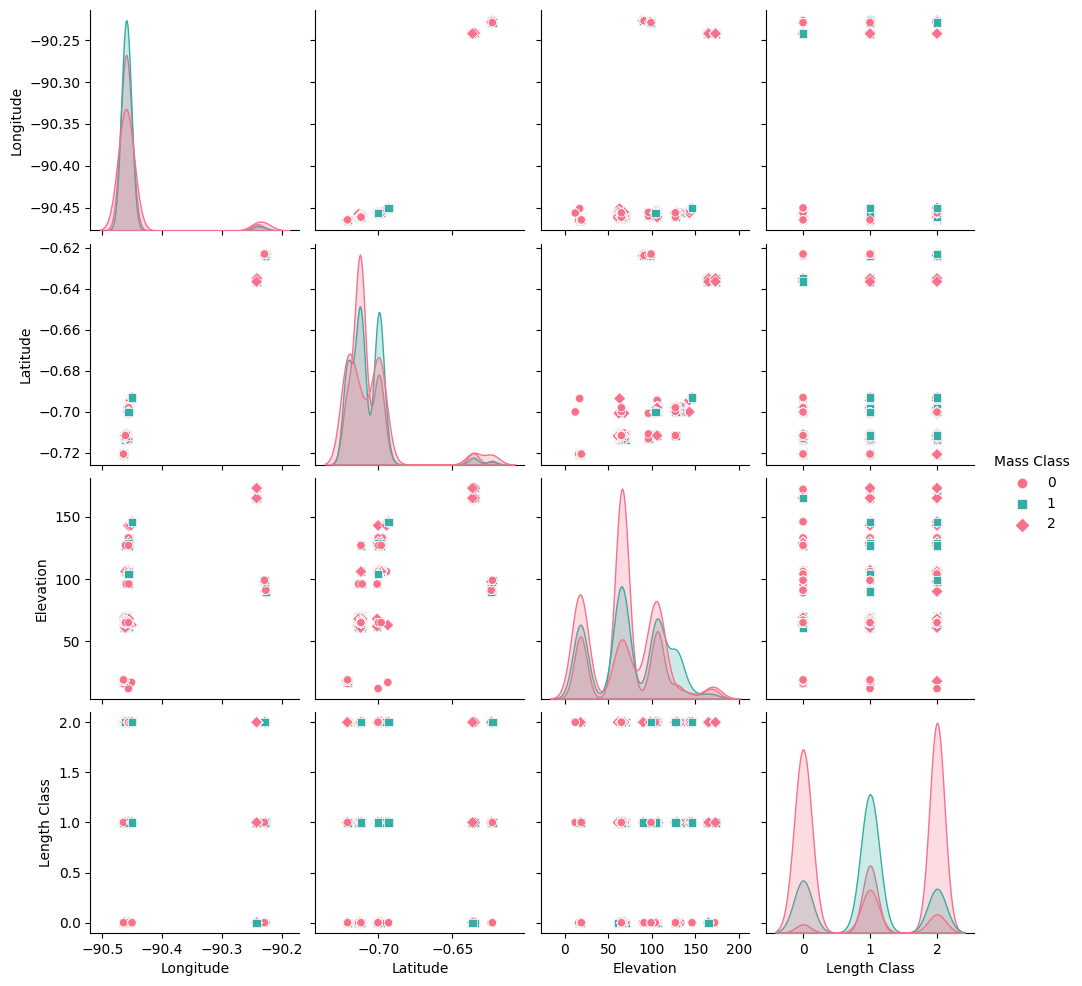

In [79]:
plt.figure(figsize=(12, 10))
sns.pairplot(data_plot, hue='Mass Class', markers=["o", "s", "D", "v"], palette="husl")
plt.show()

In [80]:
# Crear los modelos de clasificación
models = [
    ('Logistic Regression', LogisticRegression(max_iter=5000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500))
]

In [81]:
# Listas para almacenar los resultados de la validación cruzada y las pruebas
cv_accuracy_length = []
cv_accuracy_mass = []
test_accuracy_length = []
test_accuracy_mass = []

In [82]:
# Crear el objeto KFold para la validación cruzada
kf = KFold(n_splits=6, shuffle=True, random_state=42)

### Model for egg length

In [83]:
# Evaluar los modelos de clasificación para la longitud del huevo utilizando validación cruzada con KFold
print("Length Models:")
for name, model in models:
    cv_results = cross_val_score(model, X, y_length_class, cv=kf)
    cv_accuracy_length.append(cv_results.mean())
    print(f"{name} - Accuracy: {cv_results.mean():.2f} (+/- {cv_results.std() * 2:.2f})")
print()

Length Models:
Logistic Regression - Accuracy: 0.35 (+/- 0.03)
Decision Tree - Accuracy: 0.54 (+/- 0.02)
KNN - Accuracy: 0.47 (+/- 0.04)
MLP - Accuracy: 0.39 (+/- 0.06)



Cross-validation performance evaluation for Egg Length

In [84]:
cv_results

array([0.41199226, 0.41586074, 0.32495164, 0.38491296, 0.38528558,
       0.39012585])

### Model for egg mass

In [85]:
# Evaluar los modelos de clasificación para la masa del huevo utilizando validación cruzada con KFold
print("Mass Models:")
for name, model in models:
    cv_results_1 = cross_val_score(model, X, y_mass_class, cv=kf)
    cv_accuracy_mass.append(cv_results.mean())
    print(f"{name} - Accuracy: {cv_results_1.mean():.2f} (+/- {cv_results_1.std() * 2:.2f})")
print()

Mass Models:
Logistic Regression - Accuracy: 0.40 (+/- 0.09)
Decision Tree - Accuracy: 0.65 (+/- 0.01)
KNN - Accuracy: 0.57 (+/- 0.04)
MLP - Accuracy: 0.49 (+/- 0.03)



Cross-validation performance evaluation for Egg Mass

In [36]:
cv_results_1

array([0.63636364, 0.69148936, 0.65087041, 0.66247582, 0.6321394 ,
       0.66408519])

Data Test - Egg Length

In [86]:
from sklearn.metrics import confusion_matrix

# Evaluar los modelos de clasificación para la longitud del huevo utilizando los datos de prueba
print("Length Models (Test Data):")
for name, model in models:
    model.fit(X, y_length_class)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_length_test, y_pred)
    test_accuracy_length.append(accuracy)
    print(f"{name} - Accuracy: {accuracy:.2f}")
    cm = confusion_matrix(y_length_test, y_pred)
    print(f"Confusion matrix:\n{cm}\n")
    
print()

Length Models (Test Data):
Logistic Regression - Accuracy: 0.35
Confusion matrix:
[[167 245   0]
 [155 271   0]
 [134 269   0]]

Decision Tree - Accuracy: 0.58
Confusion matrix:
[[298  56  58]
 [109 188 129]
 [ 55 117 231]]

KNN - Accuracy: 0.47
Confusion matrix:
[[254  94  64]
 [162 155 109]
 [ 87 145 171]]

MLP - Accuracy: 0.34
Confusion matrix:
[[  6 406   0]
 [  4 422   0]
 [  0 403   0]]




In [87]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [88]:
y_length_test

5369    1
2463    1
2505    1
5419    1
1315    2
       ..
3647    0
2346    1
3751    0
724     1
765     2
Name: Egg length mm, Length: 1241, dtype: int64

Data Test - Egg Mass

In [42]:
# Evaluar los modelos de clasificación para la masa del huevo utilizando los datos de prueba
print("Mass Models (Test Data):")
for name, model in models:
    model.fit(X, y_mass_class)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_mass_test, y_pred)
    test_accuracy_mass.append(accuracy)
    print(f"{name} - Accuracy: {accuracy:.2f}")
    cm = confusion_matrix(y_mass_test, y_pred)
    print(cm)#print(f"Confusion matrix:\n{cm}\n")
print()

Mass Models (Test Data):
Logistic Regression - Accuracy: 0.63
[[  0   0   1]
 [  0   0 459]
 [  0   0 781]]
Decision Tree - Accuracy: 0.80
[[  0   1   0]
 [  0 345 114]
 [  0 127 654]]
KNN - Accuracy: 0.75
[[  0   0   1]
 [  0 225 234]
 [  0  74 707]]
MLP - Accuracy: 0.69
[[  0   1   0]
 [  0 182 277]
 [  0 105 676]]



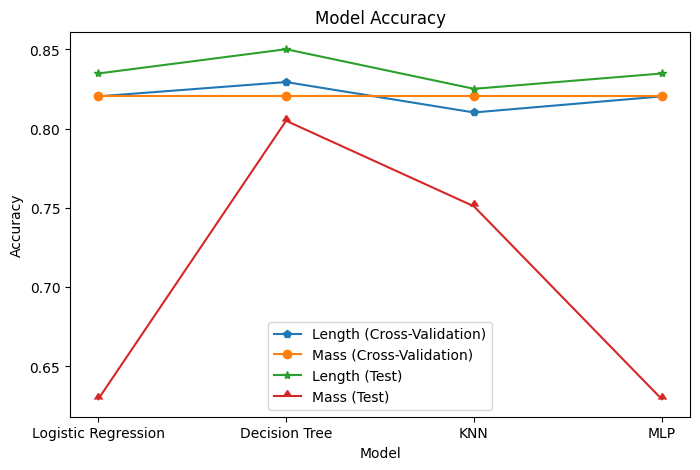

In [39]:
# Gráfica de precisión de los modelos
model_names = [name for name, _ in models]

plt.figure(figsize=(8, 5))
plt.plot(model_names, cv_accuracy_length, marker='p', label='Length (Cross-Validation)')
plt.plot(model_names, cv_accuracy_mass, marker='o', label='Mass (Cross-Validation)')
plt.plot(model_names, test_accuracy_length, marker='*', label='Length (Test)')
plt.plot(model_names, test_accuracy_mass, marker=10, label='Mass (Test)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

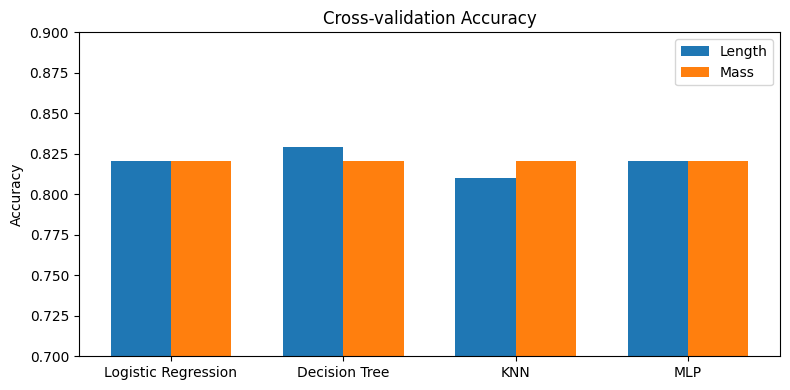

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de barras para la precisión de la validación cruzada
models_names = [name for name, _ in models]
x = np.arange(len(models_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x - width/2, cv_accuracy_length, width, label='Length')
rects2 = ax.bar(x + width/2, cv_accuracy_mass, width, label='Mass')

ax.set_ylabel('Accuracy')
ax.set_title('Cross-validation Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models_names)
ax.legend()

# Establecer límites para el eje y
ax.set_ylim(0.7, 0.9)

plt.tight_layout()
plt.show()

In [89]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[2 2]
 [1 5]]
Outcome values : 
 2 2 1 5
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           0       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



In [90]:
actual

[1, 0, 0, 1, 0, 0, 1, 0, 0, 1]

In [91]:
predicted

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0]